In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/GGColab_Project/Customer_Segmentation_KMeans/customer_data.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Đếm số lượng dòng
df.count()

,0
InvoiceNo,541909
StockCode,541909
Description,540455
Quantity,541909
InvoiceDate,541909
UnitPrice,541909
CustomerID,406829
Country,541909


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [48]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Làm sạch dữ liệu: loại bỏ nan
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [49]:
df_not_nan.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPay,0
MonetaryValue,0


In [50]:
df_not_nan.count()

,0
InvoiceNo,406829
StockCode,406829
Description,406829
Quantity,406829
InvoiceDate,406829
UnitPrice,406829
CustomerID,406829
Country,406829
TotalPay,406829
MonetaryValue,406829


In [ ]:
# Tính toán RFM

# Tính R - Recency

# Chuyển từ string sang date
df_not_nan['InvoiceDate'] =  pd.to_datetime(df_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Lấy ngày lớn nhất trong InvoiceDate + 1
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)

# -------- Tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID tính RFM

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalPay':'sum'
     }
)


<ipython-input-17-60e1ed20fbbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['InvoiceDate'] =  pd.to_datetime(df_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-17-60e1ed20fbbc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']


In [ ]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)


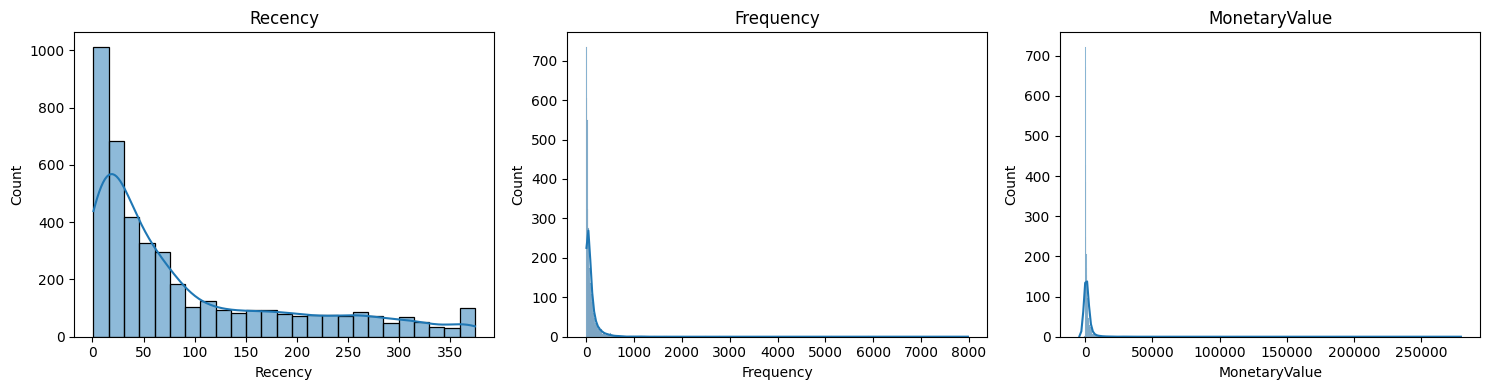

In [ ]:
# Xem phân phối dữ liệu
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_customers['Recency'], ax=ax[0], kde=True)
ax[0].set_title('Recency')

sns.histplot(df_customers['Frequency'], ax=ax[1], kde=True)
ax[1].set_title('Frequency')

sns.histplot(df_customers['MonetaryValue'], ax=ax[2], kde=True)
ax[2].set_title('MonetaryValue')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(df_customers[x], ax=ax[0,0], kde=True)
    sns.histplot(np.log(df_customers[x]), ax=ax[0,1], kde=True)
    sns.histplot(np.sqrt(df_customers[x]), ax=ax[1,0], kde=True)
    sns.histplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1], kde=True)
    plt.tight_layout()
    plt.show()

    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

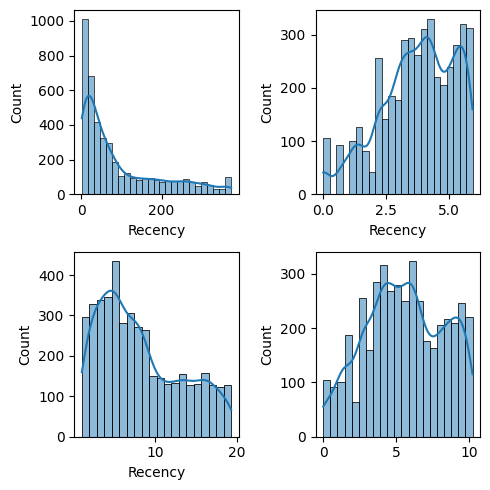

1.25
-0.53
0.59
-0.07


In [ ]:
analyze_skewness('Recency')

In [ ]:
# Transform data
df_customers_trans = pd.DataFrame()
df_customers_trans['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_trans['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_trans['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_trans.head(10)

,Recency,Frequency,MonetaryValue
0,9.876618,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001
5,4.942814,5.201183,11.561510
6,8.666162,1.442672,4.464745
7,8.988684,4.570059,10.257955
8,8.785339,2.762414,7.716085
9,4.147379,4.591627,14.113750


In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_trans)

df_customers_trans = scaler.transform(df_customers_trans)
pd.DataFrame(df_customers_trans).head()

,0,1,2
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848


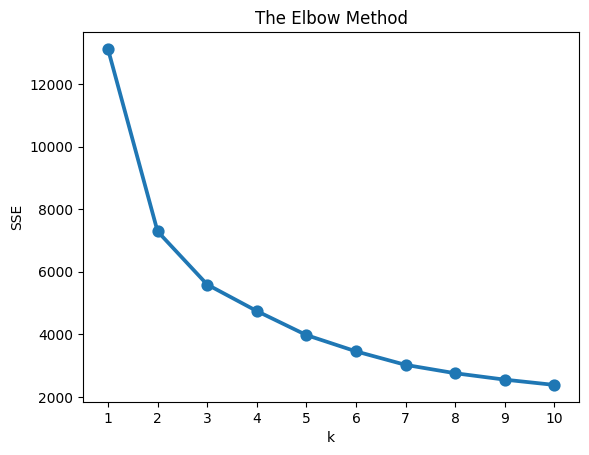

In [ ]:
# Dua du lieu vao KMeans

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_customers_trans)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, n_init=10, random_state=42)
model.fit(df_customers_trans)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1


In [ ]:
# Cluster
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,17.88,312.26,7356.52
1,185.51,19.15,351.30
2,42.63,67.12,1003.74
